In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [10]:
df = pd.read_csv('antihyperglycemia.csv', index_col='Name_Short').T

In [11]:
df = df.drop(['Number', 'Name_Thai', 'Name_Sci', 'Bioactivity_class_amylase', 'Bioactivity_class_glucosidase'])

In [12]:
df

Name_Short,G_cowa,P_debilis,P_evecta_leaf,P_evecta_Rhizome,E_cuneatum,P_anamense,A_marginata,E_cherrevensis,F_indica,H_perforata,...,D_castanea_twig,D_castanea_leaf,L_coromandelica,E_succirubrum,T_mucronata,D_winitii,B_insulana,A_vanprukii,T_triptera,C_oblongifolius
Emax_amylase_2.75mcgml,99.6,99.5,93.9,35.8,86.5,35.1,16.0,77.8,84.4,35.2,...,42.1,84.1,29.9,35.4,95.7,93.3,92.3,27.2,33.4,12.6
Emax_glucosidase_0.67mcgml,51.1,50.0,52.0,50.6,39.6,54.5,37.6,39.8,39.1,39.9,...,29.7,20.9,31.4,32.5,9.7,39.7,32.7,30.8,32.6,53.0
IC50_amylase,0.13,0.14,0.14,NaN,0.17,NaN,NaN,0.18,0.16,NaN,...,NaN,0.16,NaN,NaN,0.16,0.12,0.16,NaN,NaN,NaN
IC50_glucosidase,0.63,0.72,0.57,0.63,NaN,0.52,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49
Alkaloids,0,3,0,3,3,3,0,5,3,3,...,0,0,0,5,0,0,0,5,0,3
Antaquinones,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Carotenoids,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
flavonoids,0,5,3,5,2,3,2,2,3,2,...,2,3,3,1,2,5,1,1,2,3
Reducing_sugars,0,3,0,3,0,3,0,0,3,0,...,0,0,3,0,0,0,0,0,0,3
Saponins,2,0,3,0,3,3,3,3,2,3,...,3,4,2,1,1,3,2,4,5,2


In [21]:
df =df.rename(index={'Emax_amylase_2.75mcgml' : 'Emax_amylase', 'Emax_glucosidase_0.67mcgml' : 'Emax_glucosidase'})

In [22]:
df

Name_Short,G_cowa,P_debilis,P_evecta_leaf,P_evecta_Rhizome,E_cuneatum,P_anamense,A_marginata,E_cherrevensis,F_indica,H_perforata,...,D_castanea_twig,D_castanea_leaf,L_coromandelica,E_succirubrum,T_mucronata,D_winitii,B_insulana,A_vanprukii,T_triptera,C_oblongifolius
Emax_amylase,99.6,99.5,93.9,35.8,86.5,35.1,16.0,77.8,84.4,35.2,...,42.1,84.1,29.9,35.4,95.7,93.3,92.3,27.2,33.4,12.6
Emax_glucosidase,51.1,50.0,52.0,50.6,39.6,54.5,37.6,39.8,39.1,39.9,...,29.7,20.9,31.4,32.5,9.7,39.7,32.7,30.8,32.6,53.0
IC50_amylase,0.13,0.14,0.14,NaN,0.17,NaN,NaN,0.18,0.16,NaN,...,NaN,0.16,NaN,NaN,0.16,0.12,0.16,NaN,NaN,NaN
IC50_glucosidase,0.63,0.72,0.57,0.63,NaN,0.52,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49
Alkaloids,0,3,0,3,3,3,0,5,3,3,...,0,0,0,5,0,0,0,5,0,3
Antaquinones,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Carotenoids,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
flavonoids,0,5,3,5,2,3,2,2,3,2,...,2,3,3,1,2,5,1,1,2,3
Reducing_sugars,0,3,0,3,0,3,0,0,3,0,...,0,0,3,0,0,0,0,0,0,3
Saponins,2,0,3,0,3,3,3,3,2,3,...,3,4,2,1,1,3,2,4,5,2


In [43]:
df= df.astype(float)
df

Name_Short,G_cowa,P_debilis,P_evecta_leaf,P_evecta_Rhizome,E_cuneatum,P_anamense,A_marginata,E_cherrevensis,F_indica,H_perforata,...,D_castanea_twig,D_castanea_leaf,L_coromandelica,E_succirubrum,T_mucronata,D_winitii,B_insulana,A_vanprukii,T_triptera,C_oblongifolius
Emax_amylase,99.60,99.50,93.90,35.80,86.50,35.10,16.0,77.80,84.40,35.2,...,42.1,84.10,29.9,35.4,95.70,93.30,92.30,27.2,33.4,12.60
Emax_glucosidase,51.10,50.00,52.00,50.60,39.60,54.50,37.6,39.80,39.10,39.9,...,29.7,20.90,31.4,32.5,9.70,39.70,32.70,30.8,32.6,53.00
IC50_amylase,0.13,0.14,0.14,NaN,0.17,NaN,NaN,0.18,0.16,NaN,...,NaN,0.16,NaN,NaN,0.16,0.12,0.16,NaN,NaN,NaN
IC50_glucosidase,0.63,0.72,0.57,0.63,NaN,0.52,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49
Alkaloids,0.00,3.00,0.00,3.00,3.00,3.00,0.0,5.00,3.00,3.0,...,0.0,0.00,0.0,5.0,0.00,0.00,0.00,5.0,0.0,3.00
Antaquinones,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00
Carotenoids,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00
flavonoids,0.00,5.00,3.00,5.00,2.00,3.00,2.0,2.00,3.00,2.0,...,2.0,3.00,3.0,1.0,2.00,5.00,1.00,1.0,2.0,3.00
Reducing_sugars,0.00,3.00,0.00,3.00,0.00,3.00,0.0,0.00,3.00,0.0,...,0.0,0.00,3.0,0.0,0.00,0.00,0.00,0.0,0.0,3.00
Saponins,2.00,0.00,3.00,0.00,3.00,3.00,3.0,3.00,2.00,3.0,...,3.0,4.00,2.0,1.0,1.00,3.00,2.00,4.0,5.0,2.00


In [34]:
from scipy.stats import pearsonr
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
Res_pearson_sig = rho.round(3).astype(str) + p
Res_pearson_sig.to_csv('Res_pearson_sig_new_sampe.csv')
Res_pearson_sig

Name_Short,G_cowa,P_debilis,P_evecta_leaf,P_evecta_Rhizome,E_cuneatum,P_anamense,A_marginata,E_cherrevensis,F_indica,H_perforata,...,D_castanea_twig,D_castanea_leaf,L_coromandelica,E_succirubrum,T_mucronata,D_winitii,B_insulana,A_vanprukii,T_triptera,C_oblongifolius
Name_Short,,,,,,,,,,,,,,,,,,,,,
G_cowa,1.0***,0.997***,0.999***,0.851***,0.998***,0.829**,0.704*,0.997***,0.997***,0.91***,...,0.986***,0.968***,0.925***,0.949***,0.923***,0.995***,0.989***,0.903***,0.939***,0.567
P_debilis,0.997***,1.0***,0.997***,0.849***,0.997***,0.825**,0.693*,0.998***,0.999***,0.905***,...,0.983***,0.969***,0.922***,0.947***,0.927***,0.996***,0.99***,0.897***,0.933***,0.561
P_evecta_leaf,0.999***,0.997***,1.0***,0.868***,0.996***,0.849***,0.729*,0.997***,0.996***,0.924***,...,0.992***,0.96***,0.939***,0.959***,0.91***,0.993***,0.984***,0.917***,0.951***,0.596
P_evecta_Rhizome,0.851***,0.849***,0.868***,1.0***,0.818**,0.992***,0.957***,0.845**,0.822**,0.984***,...,0.916***,0.693*,0.977***,0.959***,0.586,0.805**,0.766**,0.973***,0.963***,0.906***
E_cuneatum,0.998***,0.997***,0.996***,0.818**,1.0***,0.796**,0.667*,0.998***,0.999***,0.889***,...,0.977***,0.979***,0.905***,0.936***,0.942***,0.998***,0.995***,0.884***,0.921***,0.516
P_anamense,0.829**,0.825**,0.849***,0.992***,0.796**,1.0***,0.978***,0.824**,0.798**,0.983***,...,0.902***,0.66*,0.974***,0.952***,0.548,0.779**,0.737*,0.978***,0.961***,0.93***
A_marginata,0.704*,0.693*,0.729*,0.957***,0.667*,0.978***,1.0***,0.698*,0.667*,0.929***,...,0.806**,0.507,0.914***,0.875***,0.379,0.646*,0.595,0.925***,0.897***,0.977***
E_cherrevensis,0.997***,0.998***,0.997***,0.845**,0.998***,0.824**,0.698*,1.0***,0.997***,0.911***,...,0.985***,0.968***,0.921***,0.952***,0.924***,0.995***,0.989***,0.906***,0.937***,0.556
F_indica,0.997***,0.999***,0.996***,0.822**,0.999***,0.798**,0.667*,0.997***,1.0***,0.889***,...,0.977***,0.978***,0.907***,0.935***,0.941***,0.998***,0.994***,0.883***,0.921***,0.519


In [59]:
pval.to_csv('Res_pearson_samples_pval.csv')
pval

Name_Short,G_cowa,P_debilis,P_evecta_leaf,P_evecta_Rhizome,E_cuneatum,P_anamense,A_marginata,E_cherrevensis,F_indica,H_perforata,...,D_castanea_twig,D_castanea_leaf,L_coromandelica,E_succirubrum,T_mucronata,D_winitii,B_insulana,A_vanprukii,T_triptera,C_oblongifolius
Name_Short,,,,,,,,,,,,,,,,,,,,,
G_cowa,0.000000e+00,9.324734e-13,2.493079e-14,8.833252e-04,9.689152e-12,1.593333e-03,2.304811e-02,1.438475e-11,1.859485e-11,2.611492e-04,...,1.722533e-07,1.115123e-06,1.262127e-04,2.716924e-05,5.006356e-05,2.693661e-10,7.344308e-09,3.494846e-04,5.679609e-05,6.866800e-02
P_debilis,9.324734e-13,0.000000e+00,1.116812e-12,9.501719e-04,2.023468e-11,1.790970e-03,2.633096e-02,5.076866e-12,6.158799e-13,3.111922e-04,...,3.490031e-07,8.603273e-07,1.457023e-04,3.299869e-05,3.939169e-05,6.637859e-11,6.824987e-09,4.359227e-04,8.212071e-05,7.272616e-02
P_evecta_leaf,2.493079e-14,1.116812e-12,0.000000e+00,5.307588e-04,1.345726e-10,9.522901e-04,1.668863e-02,2.317123e-11,1.534577e-10,1.323561e-04,...,1.866300e-08,2.986945e-06,5.658140e-05,1.206719e-05,9.957481e-05,1.069492e-09,4.824849e-08,1.907350e-04,2.301188e-05,5.291425e-02
P_evecta_Rhizome,8.833252e-04,9.501719e-04,5.307588e-04,0.000000e+00,3.790661e-03,2.161664e-09,1.412935e-05,2.090574e-03,3.526356e-03,2.976897e-07,...,1.961666e-04,2.640542e-02,1.257946e-06,1.230473e-05,7.519942e-02,4.948774e-03,9.812300e-03,2.369676e-06,7.893963e-06,1.234333e-04
E_cuneatum,9.689152e-12,2.023468e-11,1.345726e-10,3.790661e-03,0.000000e+00,5.846000e-03,3.515123e-02,6.611829e-12,8.262629e-14,5.836809e-04,...,1.266233e-06,1.591059e-07,3.210390e-04,6.929954e-05,1.490568e-05,3.904246e-12,3.016640e-10,6.771366e-04,1.548059e-04,1.269040e-01
P_anamense,1.593333e-03,1.790970e-03,9.522901e-04,2.161664e-09,5.846000e-03,0.000000e+00,1.069488e-06,3.408872e-03,5.613900e-03,3.624514e-07,...,3.512558e-04,3.765250e-02,1.891225e-06,2.129043e-05,1.009699e-01,7.913168e-03,1.503190e-02,1.004330e-06,9.620048e-06,3.306013e-05
A_marginata,2.304811e-02,2.633096e-02,1.668863e-02,1.412935e-05,3.515123e-02,1.069488e-06,0.000000e+00,2.480288e-02,3.521261e-02,1.034568e-04,...,4.905182e-03,1.346334e-01,2.153556e-04,9.150909e-04,2.797540e-01,4.354083e-02,6.955938e-02,1.264392e-04,4.361494e-04,1.215391e-06
E_cherrevensis,1.438475e-11,5.076866e-12,2.317123e-11,2.090574e-03,6.611829e-12,3.408872e-03,2.480288e-02,0.000000e+00,1.285304e-11,2.510858e-04,...,2.407907e-07,1.058454e-06,1.571772e-04,2.246075e-05,4.754621e-05,2.867421e-10,1.041845e-08,3.020194e-04,6.282265e-05,9.536637e-02
F_indica,1.859485e-11,6.158799e-13,1.534577e-10,3.526356e-03,8.262629e-14,5.613900e-03,3.521261e-02,1.285304e-11,0.000000e+00,5.749345e-04,...,1.253610e-06,1.923178e-07,2.869320e-04,7.068724e-05,1.579967e-05,3.569400e-12,4.180545e-10,7.162987e-04,1.577917e-04,1.241813e-01


In [36]:
Res_pearson = df.corr(method='pearson').round(3)
Res_pearson.to_csv('Res_pearson_samples.csv')
Res_pearson

Name_Short,G_cowa,P_debilis,P_evecta_leaf,P_evecta_Rhizome,E_cuneatum,P_anamense,A_marginata,E_cherrevensis,F_indica,H_perforata,...,D_castanea_twig,D_castanea_leaf,L_coromandelica,E_succirubrum,T_mucronata,D_winitii,B_insulana,A_vanprukii,T_triptera,C_oblongifolius
Name_Short,,,,,,,,,,,,,,,,,,,,,
G_cowa,1.000,0.997,0.999,0.851,0.998,0.829,0.704,0.997,0.997,0.910,...,0.986,0.968,0.925,0.949,0.923,0.995,0.989,0.903,0.939,0.567
P_debilis,0.997,1.000,0.997,0.849,0.997,0.825,0.693,0.998,0.999,0.905,...,0.983,0.969,0.922,0.947,0.927,0.996,0.990,0.897,0.933,0.561
P_evecta_leaf,0.999,0.997,1.000,0.868,0.996,0.849,0.729,0.997,0.996,0.924,...,0.992,0.960,0.939,0.959,0.910,0.993,0.984,0.917,0.951,0.596
P_evecta_Rhizome,0.851,0.849,0.868,1.000,0.818,0.992,0.957,0.845,0.822,0.984,...,0.916,0.693,0.977,0.959,0.586,0.805,0.766,0.973,0.963,0.906
E_cuneatum,0.998,0.997,0.996,0.818,1.000,0.796,0.667,0.998,0.999,0.889,...,0.977,0.979,0.905,0.936,0.942,0.998,0.995,0.884,0.921,0.516
P_anamense,0.829,0.825,0.849,0.992,0.796,1.000,0.978,0.824,0.798,0.983,...,0.902,0.660,0.974,0.952,0.548,0.779,0.737,0.978,0.961,0.930
A_marginata,0.704,0.693,0.729,0.957,0.667,0.978,1.000,0.698,0.667,0.929,...,0.806,0.507,0.914,0.875,0.379,0.646,0.595,0.925,0.897,0.977
E_cherrevensis,0.997,0.998,0.997,0.845,0.998,0.824,0.698,1.000,0.997,0.911,...,0.985,0.968,0.921,0.952,0.924,0.995,0.989,0.906,0.937,0.556
F_indica,0.997,0.999,0.996,0.822,0.999,0.798,0.667,0.997,1.000,0.889,...,0.977,0.978,0.907,0.935,0.941,0.998,0.994,0.883,0.921,0.519


<function matplotlib.pyplot.show(close=None, block=None)>

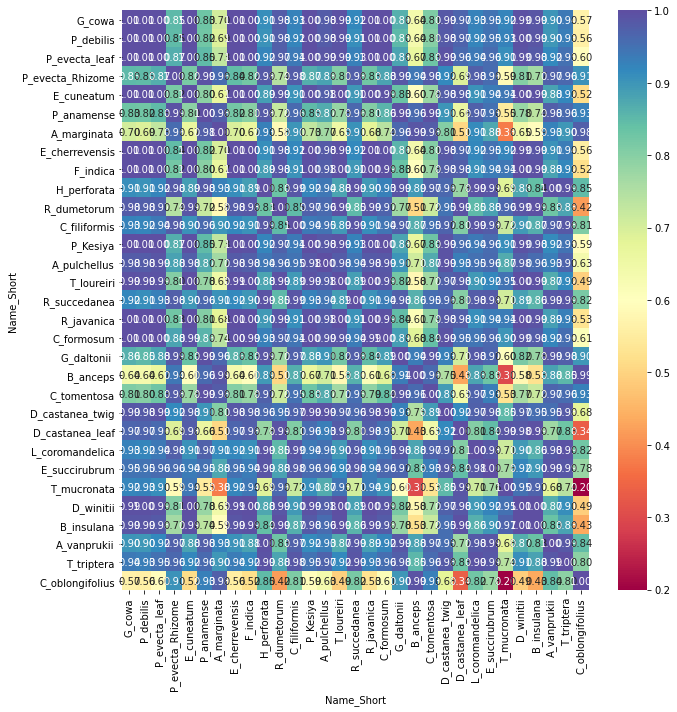

In [37]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(Res_pearson, annot=True, cmap='Spectral', fmt='.2f')
plt.tight_layout()
plt.show

In [61]:
df = pd.read_csv("Res_pearson_samples.csv", index_col='Name_Short')

In [62]:
df

,G_cowa,P_debilis,P_evecta_leaf,P_evecta_Rhizome,E_cuneatum,P_anamense,A_marginata,E_cherrevensis,F_indica,H_perforata,...,D_castanea_twig,D_castanea_leaf,L_coromandelica,E_succirubrum,T_mucronata,D_winitii,B_insulana,A_vanprukii,T_triptera,C_oblongifolius
Name_Short,,,,,,,,,,,,,,,,,,,,,
G_cowa,1.000,0.997,0.999,0.851,0.998,0.829,0.704,0.997,0.997,0.910,...,0.986,0.968,0.925,0.949,0.923,0.995,0.989,0.903,0.939,0.567
P_debilis,0.997,1.000,0.997,0.849,0.997,0.825,0.693,0.998,0.999,0.905,...,0.983,0.969,0.922,0.947,0.927,0.996,0.990,0.897,0.933,0.561
P_evecta_leaf,0.999,0.997,1.000,0.868,0.996,0.849,0.729,0.997,0.996,0.924,...,0.992,0.960,0.939,0.959,0.910,0.993,0.984,0.917,0.951,0.596
P_evecta_Rhizome,0.851,0.849,0.868,1.000,0.818,0.992,0.957,0.845,0.822,0.984,...,0.916,0.693,0.977,0.959,0.586,0.805,0.766,0.973,0.963,0.906
E_cuneatum,0.998,0.997,0.996,0.818,1.000,0.796,0.667,0.998,0.999,0.889,...,0.977,0.979,0.905,0.936,0.942,0.998,0.995,0.884,0.921,0.516
P_anamense,0.829,0.825,0.849,0.992,0.796,1.000,0.978,0.824,0.798,0.983,...,0.902,0.660,0.974,0.952,0.548,0.779,0.737,0.978,0.961,0.930
A_marginata,0.704,0.693,0.729,0.957,0.667,0.978,1.000,0.698,0.667,0.929,...,0.806,0.507,0.914,0.875,0.379,0.646,0.595,0.925,0.897,0.977
E_cherrevensis,0.997,0.998,0.997,0.845,0.998,0.824,0.698,1.000,0.997,0.911,...,0.985,0.968,0.921,0.952,0.924,0.995,0.989,0.906,0.937,0.556
F_indica,0.997,0.999,0.996,0.822,0.999,0.798,0.667,0.997,1.000,0.889,...,0.977,0.978,0.907,0.935,0.941,0.998,0.994,0.883,0.921,0.519


In [55]:
#convert matrix to list of edges and rename the columns
edges = df.stack().reset_index()
edges.columns = ['Features_1','Features_2','correlation']
#remove self correlations
edges = edges.loc[edges['Features_1'] != edges['Features_2']].copy()

In [56]:
edges

,Features_1,Features_2,correlation
1,G_cowa,P_debilis,0.997
2,G_cowa,P_evecta_leaf,0.999
3,G_cowa,P_evecta_Rhizome,0.851
4,G_cowa,E_cuneatum,0.998
5,G_cowa,P_anamense,0.829
...,...,...,...
955,C_oblongifolius,T_mucronata,0.199
956,C_oblongifolius,D_winitii,0.492
957,C_oblongifolius,B_insulana,0.434
958,C_oblongifolius,A_vanprukii,0.845


In [63]:
df2 = pd.read_csv("Res_pearson_samples_pval.csv", index_col='Name_Short')
df2

,G_cowa,P_debilis,P_evecta_leaf,P_evecta_Rhizome,E_cuneatum,P_anamense,A_marginata,E_cherrevensis,F_indica,H_perforata,...,D_castanea_twig,D_castanea_leaf,L_coromandelica,E_succirubrum,T_mucronata,D_winitii,B_insulana,A_vanprukii,T_triptera,C_oblongifolius
Name_Short,,,,,,,,,,,,,,,,,,,,,
G_cowa,0.000000e+00,9.324734e-13,2.493079e-14,8.833252e-04,9.689152e-12,1.593333e-03,2.304811e-02,1.438475e-11,1.859485e-11,2.611492e-04,...,1.722533e-07,1.115123e-06,1.262127e-04,2.716924e-05,5.006356e-05,2.693661e-10,7.344308e-09,3.494846e-04,5.679609e-05,6.866800e-02
P_debilis,9.324734e-13,0.000000e+00,1.116812e-12,9.501719e-04,2.023468e-11,1.790970e-03,2.633096e-02,5.076866e-12,6.158799e-13,3.111922e-04,...,3.490031e-07,8.603273e-07,1.457023e-04,3.299869e-05,3.939169e-05,6.637859e-11,6.824987e-09,4.359227e-04,8.212071e-05,7.272616e-02
P_evecta_leaf,2.493079e-14,1.116812e-12,0.000000e+00,5.307588e-04,1.345726e-10,9.522901e-04,1.668863e-02,2.317123e-11,1.534577e-10,1.323561e-04,...,1.866300e-08,2.986945e-06,5.658140e-05,1.206719e-05,9.957481e-05,1.069492e-09,4.824849e-08,1.907350e-04,2.301188e-05,5.291425e-02
P_evecta_Rhizome,8.833252e-04,9.501719e-04,5.307588e-04,0.000000e+00,3.790661e-03,2.161664e-09,1.412935e-05,2.090574e-03,3.526356e-03,2.976897e-07,...,1.961666e-04,2.640542e-02,1.257946e-06,1.230473e-05,7.519942e-02,4.948774e-03,9.812300e-03,2.369676e-06,7.893963e-06,1.234333e-04
E_cuneatum,9.689152e-12,2.023468e-11,1.345726e-10,3.790661e-03,0.000000e+00,5.846000e-03,3.515123e-02,6.611829e-12,8.262629e-14,5.836809e-04,...,1.266233e-06,1.591059e-07,3.210390e-04,6.929954e-05,1.490568e-05,3.904246e-12,3.016640e-10,6.771366e-04,1.548059e-04,1.269040e-01
P_anamense,1.593333e-03,1.790970e-03,9.522901e-04,2.161664e-09,5.846000e-03,0.000000e+00,1.069488e-06,3.408872e-03,5.613900e-03,3.624514e-07,...,3.512558e-04,3.765250e-02,1.891225e-06,2.129043e-05,1.009699e-01,7.913168e-03,1.503190e-02,1.004330e-06,9.620048e-06,3.306013e-05
A_marginata,2.304811e-02,2.633096e-02,1.668863e-02,1.412935e-05,3.515123e-02,1.069488e-06,0.000000e+00,2.480288e-02,3.521261e-02,1.034568e-04,...,4.905182e-03,1.346334e-01,2.153556e-04,9.150909e-04,2.797540e-01,4.354083e-02,6.955938e-02,1.264392e-04,4.361494e-04,1.215391e-06
E_cherrevensis,1.438475e-11,5.076866e-12,2.317123e-11,2.090574e-03,6.611829e-12,3.408872e-03,2.480288e-02,0.000000e+00,1.285304e-11,2.510858e-04,...,2.407907e-07,1.058454e-06,1.571772e-04,2.246075e-05,4.754621e-05,2.867421e-10,1.041845e-08,3.020194e-04,6.282265e-05,9.536637e-02
F_indica,1.859485e-11,6.158799e-13,1.534577e-10,3.526356e-03,8.262629e-14,5.613900e-03,3.521261e-02,1.285304e-11,0.000000e+00,5.749345e-04,...,1.253610e-06,1.923178e-07,2.869320e-04,7.068724e-05,1.579967e-05,3.569400e-12,4.180545e-10,7.162987e-04,1.577917e-04,1.241813e-01


In [66]:
#convert matrix to list of edges and rename the columns
edges2 = df2.stack().reset_index()
edges2.columns = ['Features_1','Features_2','P']
#remove self correlations
edges2 = edges2.loc[edges2['Features_1'] != edges2['Features_2']].copy()
edges2

,Features_1,Features_2,P
1,G_cowa,P_debilis,9.324734e-13
2,G_cowa,P_evecta_leaf,2.493079e-14
3,G_cowa,P_evecta_Rhizome,8.833252e-04
4,G_cowa,E_cuneatum,9.689152e-12
5,G_cowa,P_anamense,1.593333e-03
...,...,...,...
955,C_oblongifolius,T_mucronata,5.805562e-01
956,C_oblongifolius,D_winitii,1.486397e-01
957,C_oblongifolius,B_insulana,2.096942e-01
958,C_oblongifolius,A_vanprukii,2.110452e-03


In [82]:
Edges = pd.concat([edges2, edges['correlation']], axis=1) 

In [83]:
Edges

,Features_1,Features_2,P,correlation
1,G_cowa,P_debilis,9.324734e-13,0.997
2,G_cowa,P_evecta_leaf,2.493079e-14,0.999
3,G_cowa,P_evecta_Rhizome,8.833252e-04,0.851
4,G_cowa,E_cuneatum,9.689152e-12,0.998
5,G_cowa,P_anamense,1.593333e-03,0.829
...,...,...,...,...
955,C_oblongifolius,T_mucronata,5.805562e-01,0.199
956,C_oblongifolius,D_winitii,1.486397e-01,0.492
957,C_oblongifolius,B_insulana,2.096942e-01,0.434
958,C_oblongifolius,A_vanprukii,2.110452e-03,0.845


In [84]:
Edges = Edges.drop(Edges[Edges.P > 0.05].index)

In [85]:
Edges

,Features_1,Features_2,P,correlation
1,G_cowa,P_debilis,9.324734e-13,0.997
2,G_cowa,P_evecta_leaf,2.493079e-14,0.999
3,G_cowa,P_evecta_Rhizome,8.833252e-04,0.851
4,G_cowa,E_cuneatum,9.689152e-12,0.998
5,G_cowa,P_anamense,1.593333e-03,0.829
...,...,...,...,...
951,C_oblongifolius,D_castanea_twig,3.062046e-02,0.680
953,C_oblongifolius,L_coromandelica,3.290810e-03,0.825
954,C_oblongifolius,E_succirubrum,8.107604e-03,0.778
958,C_oblongifolius,A_vanprukii,2.110452e-03,0.845


In [87]:
#create undirected graph with weights corresponding to the correlation magnitude
G0 = nx.from_pandas_edgelist(Edges, 'Features_1', 'Features_2', edge_attr=['correlation'])

#print out the graph info
#check number of nodes and degrees are as expected (all should have degree = 38, i.e. average degree = 38)
print(nx.info(G0))

Graph with 31 nodes and 434 edges


In [88]:
def assign_colour(correlation):
    if correlation <= 0:
        return "#F037A5"  # blue
    else:
        return "#3DB2FF"  # blue

def assign_thickness(correlation, benchmark_thickness=1, scaling_factor=10):
    return benchmark_thickness * abs(correlation)*scaling_factor

def assign_node_size(degree, scaling_factor=100):
    return degree * scaling_factor


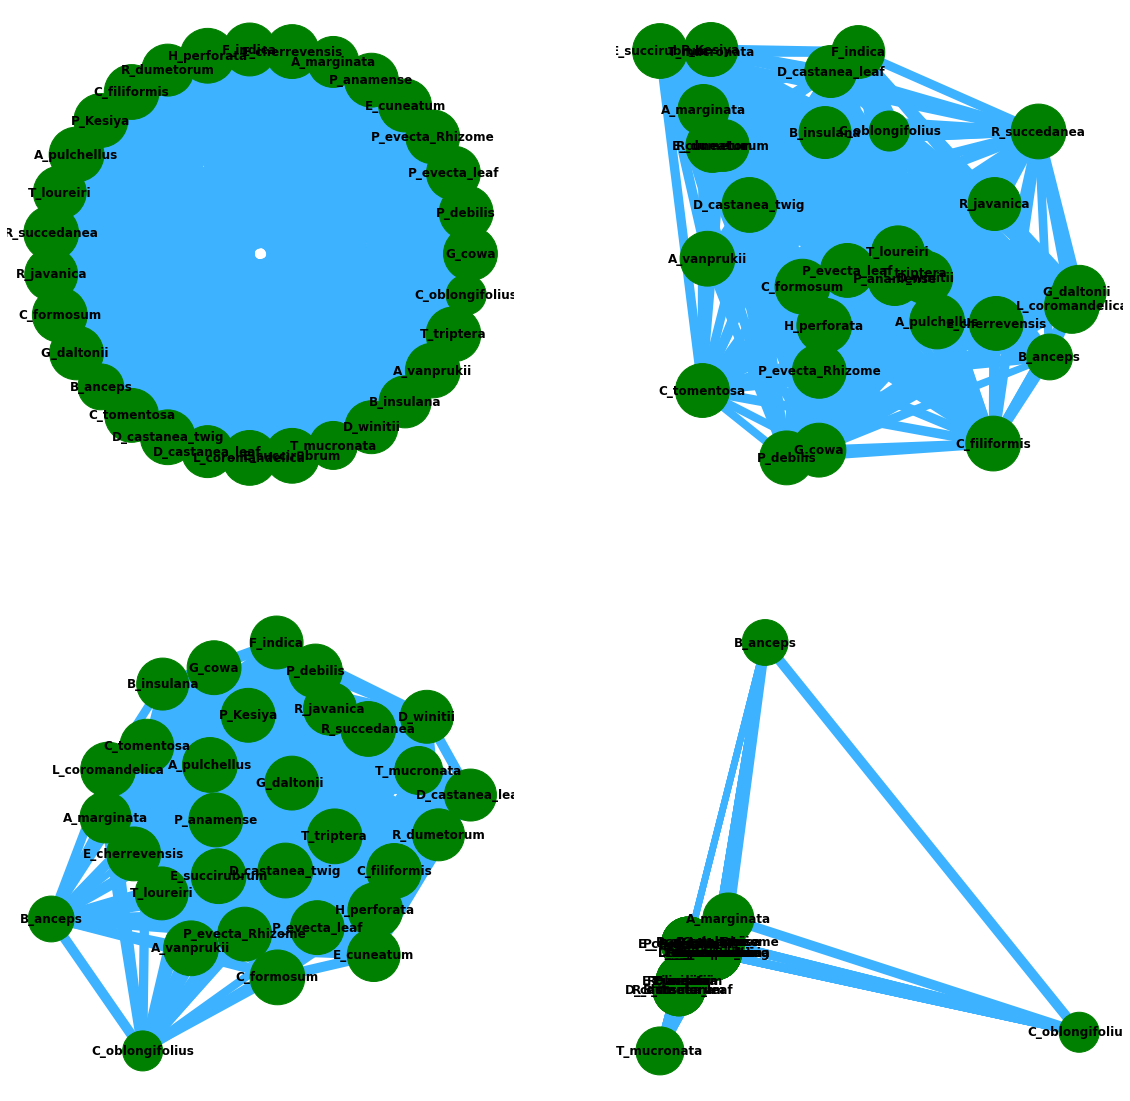

In [89]:
edge_colors_0 = []
edge_width_0 = []
for key, value in nx.get_edge_attributes(G0, 'correlation').items():
    edge_colors_0.append(assign_colour(value))
    edge_width_0.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size_0 = []
for key, value in dict(G0.degree).items():
    node_size_0.append(assign_node_size(value))
    
color_map_0 = []
for node in G0:
    if node in {'Emax_amylase', 'Emax_glucosidase', 'IC50_amylase', 'IC50_glucosidase'}:
        color_map_0.append('orange')
    else: 
        color_map_0.append('green') 
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,20))
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.circular_layout(G0), font_weight = 'bold', ax=ax[0,0])
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.random_layout(G0), font_weight = 'bold', ax=ax[0,1])
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.spring_layout(G0), font_weight = 'bold', ax=ax[1,0])
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.spectral_layout(G0), font_weight = 'bold', ax=ax[1,1])

plt.show()

In [90]:
# 'winner takes all' method - set minium correlation threshold to remove some edges from the diagram
threshold = 0.3

# create a new graph from edge list
Gx = nx.from_pandas_edgelist(Edges, 'Features_1', 'Features_2', edge_attr=['correlation'])

# list to store edges to remove
remove = []
# loop through edges in Gx and find correlations which are below the threshold
for Features_1, Features_2 in Gx.edges():
    corr = Gx[Features_1][Features_2]['correlation']
    #add to remove node list if abs(corr) < threshold
    if abs(corr) < threshold:
        remove.append((Features_1, Features_2))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")

# assign colours to edges depending on positive or negative correlation
# assign edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, 'correlation').items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value))
    
color_map = []
for node in Gx:
    if node in {'Emax_amylase', 'Emax_glucosidase', 'IC50_amylase', 'IC50_glucosidase'}:
        color_map.append('orange')
    else: 
        color_map.append('green') 

0 edges removed


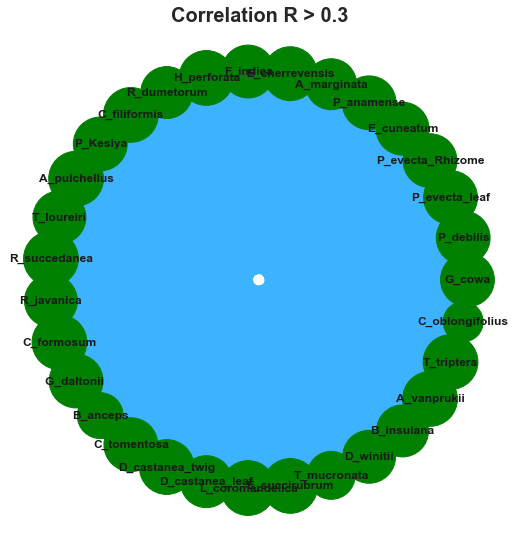

In [94]:
# draw improved graph
sns.set(rc={'figure.figsize': (7, 7)})

nx.draw(Gx, pos=nx.circular_layout(Gx), with_labels=True,
        node_size=node_size, node_color=color_map, edge_color=edge_colours, width=edge_width,
        font_size=12, font_weight = 'bold')

#edge_labels = nx.get_edge_attributes(Gx,'correlation') # key is edge, pls check for your case

#edge_labels = dict([((n1, n2), f"{d['correlation']:.2f}")
                    #for n1, n2, d in Gx.edges(data=True)])


#nx.draw_networkx_edge_labels(Gx, pos=nx.circular_layout(Gx), edge_labels=edge_labels,
                             #font_color='black', font_size=10)


plt.title("Correlation R > 0.3", fontsize='20', weight = 'bold')
plt.savefig('corr_pearson_net_samp.pdf', dpi=300)
plt.show()